# Forecast

## Setup

In [2]:
%load_ext autoreload
%autoreload 2

In [ ]:
import sys
sys.path.append("..")

# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

import m5.preprocessing
from m5.models import Naive, ETS, ARIMA, BottomUp
from m5.evaluate import accuracy
from m5.plot import plot_fcst

# Library settings
pd.options.display.max_columns = 999
plt.rcParams["figure.figsize"] = (16, 4)

## Preprocessing

In [7]:
m5.preprocessing.unzip_data()

In [8]:
m5.preprocessing.prepare_base_data(cfg.TASK)

In [10]:
m5.preprocessing.prepare_agg_levels()

Preparing agg level 12
Preparing agg level 11 
Done.


In [13]:
m5.preprocessing.prepare_store_data()

Preparing store data 9
Done.


## Naive

In [3]:
naive_bu = BottomUp("naive", Naive)

In [4]:
naive_bu.train()

Training model for item 3048 and store 0   
Done.


In [5]:
naive_bu.predict(fh=28)

Making predictions for item 3048 and store 0   
Done.
Making predictions for level 11   
Done


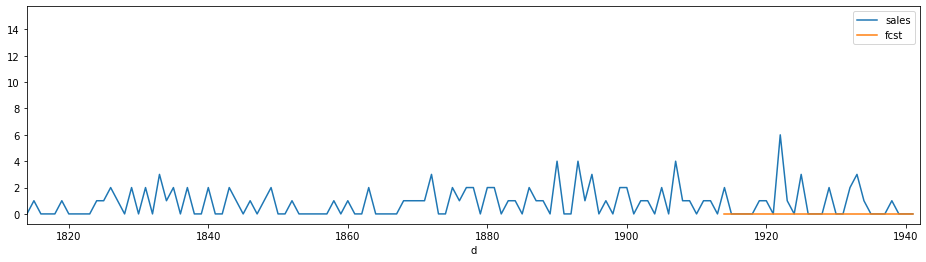

In [6]:
plot_fcst("naive", level=12, key=(0, 0))

In [7]:
accuracy(model="naive")

,1,2,3,4,5,6,7,8,9,10,11,12,Average
wmrsse,0.271476,0.262661,0.205999,0.269965,0.271293,0.255919,0.256477,0.197482,0.194196,0.322608,0.234173,0.126265,0.239043


## ETS

In [8]:
ets_bu = BottomUp(model_name="ets", model_cls=ETS, model_params={"auto": True}, regressors=None)

In [9]:
ets_bu.train()

C:\Users\ariel\anaconda3\envs\python\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


C:\Users\ariel\anaconda3\envs\python\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ariel\anaconda3\envs\python\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Training model for item 3048 and store 0   
Done.


In [10]:
ets_bu.predict(fh=28)

Making predictions for item 3048 and store 0   
Done.
Making predictions for level 11   
Done


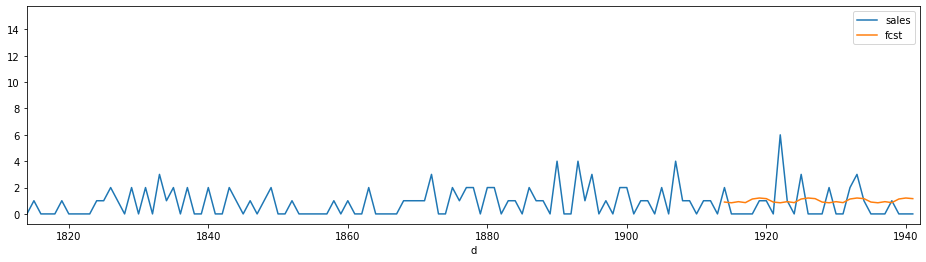

In [20]:
plot_fcst("ets", level=12, key=(0, 0))

In [11]:
accuracy(model="ets")

,1,2,3,4,5,6,7,8,9,10,11,12,Average
wmrsse,0.073821,0.071424,0.056016,0.082288,0.089415,0.077526,0.083283,0.059017,0.061862,0.245327,0.176821,0.093265,0.097505


## ARIMA

In [6]:
arima_bu = BottomUp(model_name="arima", model_cls=ARIMA, model_params={"m": 7}, regressors=None)

In [ ]:
arima_bu.train()

In [ ]:
arima_bu.predict(fh=28)

In [ ]:
plot_fcst("arima", level=12, key=(0, 0))

In [ ]:
accuracy(model="arima")

## Misc